In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as sk
import math
from sklearn import preprocessing

    Dropping features that seem irrelevant (such as ID) or that gives some kind of repeated information (such as usd_pledfed_real, usd_goal_real and category). Also removed backers because I didn't want to make my model influenced by it (but it is an actual valid information, maybe I will try again without removing it).

In [64]:
# df = pd.read_csv('ks-projects-201612.csv')
df2018 = pd.read_csv('ks-projects-201801.csv')

In [65]:
df2018.drop(['ID', 'name', 'usd_pledged_real', 'usd_goal_real', 'backers', 'category'], axis=1, inplace=True)
print df2018.shape

(378661, 9)


In [66]:
label_column = 'state'
time_column = 'time_elapsed'

df2018['launched'] = pd.to_datetime(df2018['launched'])
df2018['deadline'] = pd.to_datetime(df2018['deadline'])
df2018[time_column] = (df2018.deadline - df2018.launched).astype('timedelta64[h]')
# print df2018['launched'].head(10)
# print(df2018[time_column].head(15))

df2018.drop(['launched', 'deadline'], axis=1, inplace=True)

In [67]:
columns = ['main_category','currency', 'state', 'country']
df2018[columns] = df2018[columns].apply(lambda x: pd.factorize(x)[0])
# df2018 = df2018.apply(lambda x: pd.factorize(x)[0])

print df2018.head()

   main_category  currency     goal  pledged  state  country  usd pledged  \
0              0         0   1000.0      0.0      0        0          0.0   
1              1         1  30000.0   2421.0      0        1        100.0   
2              1         1  45000.0    220.0      0        1        220.0   
3              2         1   5000.0      1.0      0        1          1.0   
4              1         1  19500.0   1283.0      1        1       1283.0   

   time_elapsed  
0        1403.0  
1        1435.0  
2        1079.0  
3         716.0  
4        1335.0  


In [68]:
df2018_copy = df2018

In [69]:
df2018.dropna(inplace=True)

In [70]:
y_target = df2018[label_column]
df2018.drop([label_column], axis=1, inplace=True)

In [71]:
# Normalizing data
x = df2018.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df2018 = pd.DataFrame(x_scaled, columns=df2018.columns)

print df2018.head()

   main_category  currency      goal       pledged   country   usd pledged  \
0       0.000000  0.000000  0.000010  0.000000e+00  0.000000  0.000000e+00   
1       0.071429  0.076923  0.000300  1.190325e-04  0.045455  4.916666e-06   
2       0.071429  0.076923  0.000450  1.081666e-05  0.045455  1.081666e-05   
3       0.142857  0.076923  0.000050  4.916666e-08  0.045455  4.916666e-08   
4       0.071429  0.076923  0.000195  6.308082e-05  0.045455  6.308082e-05   

   time_elapsed  
0      0.003492  
1      0.003572  
2      0.002686  
3      0.001782  
4      0.003323  


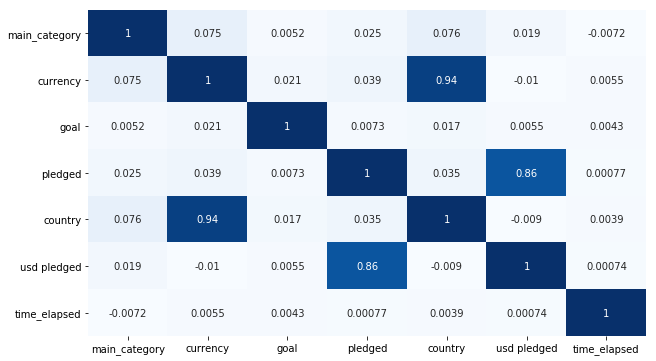

In [91]:
corr = df2018.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, cbar=None, annot=True, cmap='Blues')
plt.show()

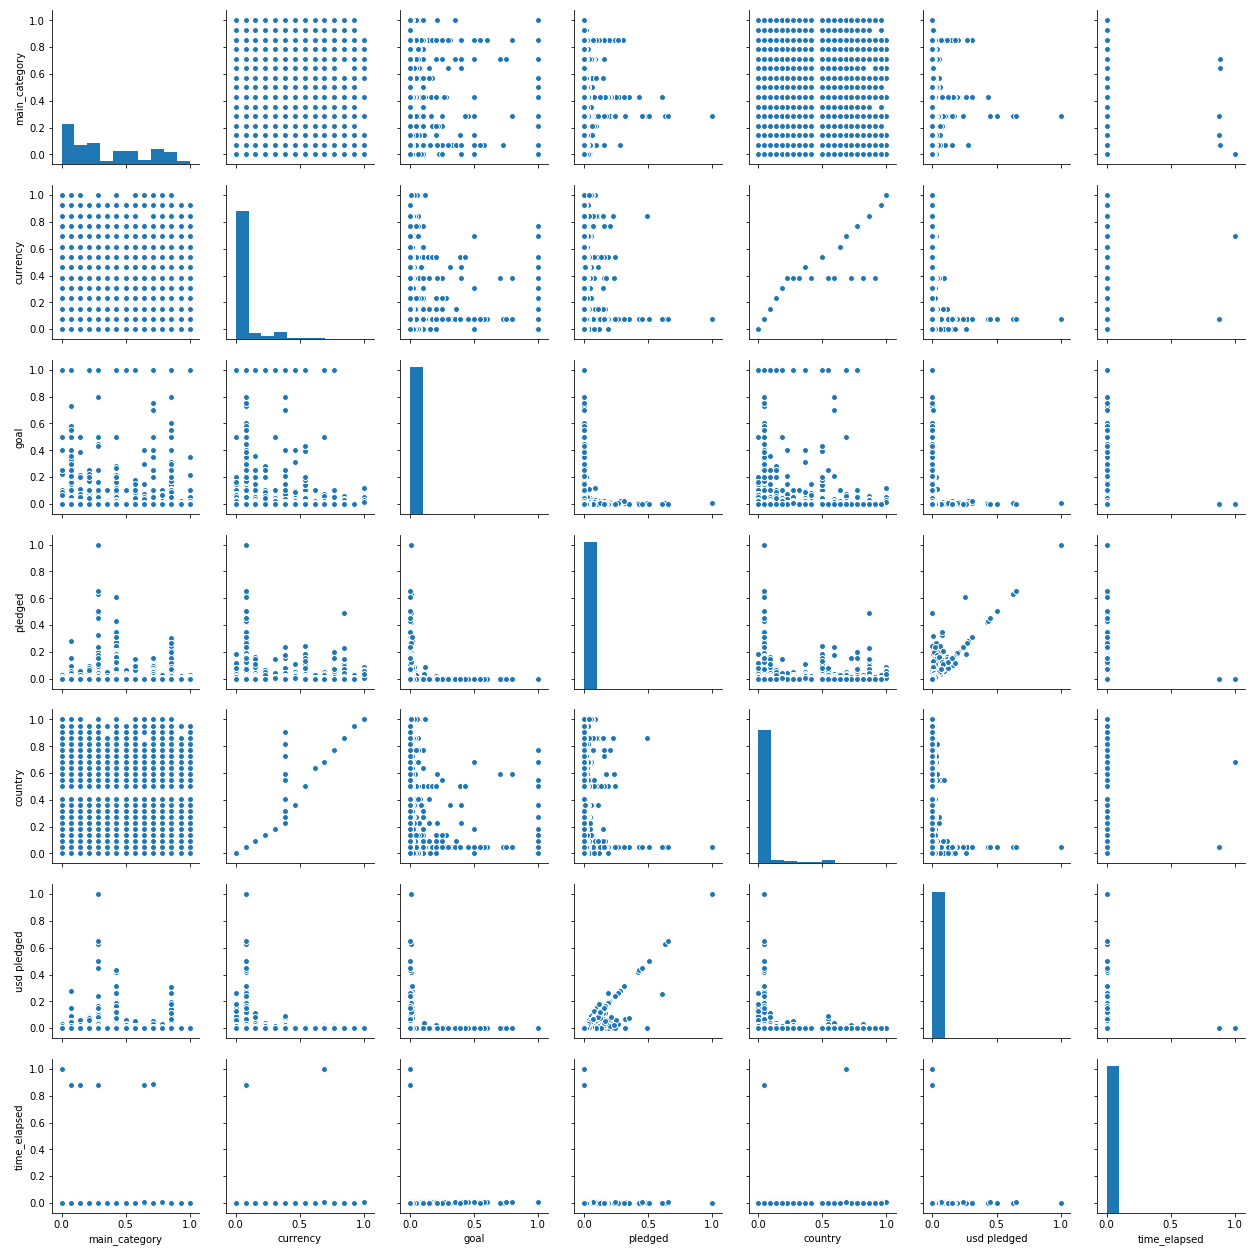

In [94]:
sns.pairplot(df2018)
plt.show()

In [73]:
from sklearn.preprocessing import StandardScaler

#In general a good idea is to scale the data
scaler = StandardScaler()
scaler.fit(df2018_copy)
X=scaler.transform(df2018_copy)    

pca = PCA()
x_new = pca.fit_transform(X)

In [74]:
x_new

array([[-1.21297847e+00,  1.88724061e-01,  6.50009143e-01, ...,
        -7.71725561e-01,  1.44303546e-02,  2.30313524e-01],
       [-4.61403919e-01, -1.27264045e-02,  6.15072866e-01, ...,
        -6.28773581e-01,  1.88416692e-02, -1.26231388e-03],
       [-4.67188299e-01, -2.68235901e-02,  4.34956056e-01, ...,
        -7.30914316e-01,  1.52550566e-03, -2.06146488e-03],
       ...,
       [-4.68856308e-01, -2.99874053e-02,  4.25911440e-01, ...,
        -7.24071075e-01,  1.86854726e-03, -2.11133057e-03],
       [-1.60882868e-01, -3.25553640e-02, -5.99013906e-01, ...,
         1.48752742e+00, -3.16084254e-03, -4.67943802e-03],
       [-2.16030221e-01, -2.64283842e-02, -4.84649780e-01, ...,
         1.05160640e+00, -2.82484801e-03, -4.34709134e-03]])

In [75]:
from sklearn.decomposition import PCA
import visuals as vs


pca = PCA(n_components=len(df2018.columns))
pca.fit(df2018)

# Generate PCA results plot
pca_results = vs.pca_results(df2018, pca)

ImportError: No module named visuals

In [76]:
# print "plot scatter"
# pd.plotting.scatter_matrix(df2018, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

    First, let's try using a linear model.

In [77]:
X = np.array(df2018)
# y = df2018[label_column].shift(-shift_param)
y = y_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=89, shuffle=True)

print "Starting..."

# clf = LinearRegression()
clf = sk.LogisticRegression()
clf.fit(X_train, y_train)

print "Finished!"

print clf.score(X_test, y_test)

Starting...
Finished!
0.5378469582382991


In [10]:
print len(X)

374864


    What I tried to do next was to separate some data to test the model with information that it (the model) had never seen so we can attest for its generalization.

In [78]:
# X = preprocessing.scale(X)

shift_param = int(math.ceil(len(X)*0.1))
X_predict = X[~shift_param:]
y_predict = y[~shift_param:]
X = X[:~shift_param+1]
y = y[:~shift_param+1]

#Again slicing the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=89, shuffle=True)
clf.fit(X_train, y_train)

print clf.score(X_test, y_test)

0.5358053233742368


In [15]:
print len(X)

340794


In [79]:
y_predictions = clf.predict(X_predict)

print clf.score(X_predict, y_predict)

0.5374786598378147


    Now, let's try using a non-linear model to see how we can have better conclusions about our data.

In [80]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(X_train, y_train, verbose=False)

predictions = my_model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error : 0.3196758612048733


In [81]:
my_predictions = my_model.predict(X_predict)
print("Mean Absolute Error : " + str(mean_absolute_error(my_predictions, y_predict)))

Mean Absolute Error : 0.323270596053437


In [82]:
from sklearn.neural_network import MLPClassifier

newClf = MLPClassifier(alpha=1)

newClf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [83]:
newClf.score(X_test, y_test)

0.5264242100895133

In [86]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [87]:
score = mlp.score(X_test, y_test)
print score

0.5302071985311334
